In [1]:
# Module Importations
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

# Module versioning information
print('Numpy Version =', np.__version__)
print('Pandas Version =', pd.__version__)
print('Seaborn Version =', sns.__version__)

Numpy Version = 1.19.4
Pandas Version = 1.1.4
Seaborn Version = 0.10.0


In [2]:
# Custom Modules
from Source.Data import ntfp_dataset_import
from Source.Features import ntfp_dataset_preprocessing as preprocessing

In [ ]:
# Constants
SAVE_FIGS = False

In [3]:
# Constants
SAVE_FIGURES = False

In [4]:
# Load Dataset
raw_data_df = ntfp_dataset_import.import_dataset()

<bound method NDFrame.head of         Cycles    Set-1   Set-2  Set-3   Sn_01   Sn_02    Sn_03    Sn_04  \
Engine                                                                     
1            1  -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1            2   0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
1            3  -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
1            4   0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
1            5  -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...        ...      ...     ...    ...     ...     ...      ...      ...   
709        251   9.9998  0.2500  100.0  489.05  605.33  1516.36  1315.28   
709        252   0.0028  0.0015  100.0  518.67  643.42  1598.92  1426.77   
709        253   0.0029  0.0000  100.0  518.67  643.68  1607.72  1430.56   
709        254  35.0046  0.8400  100.0  449.44  555.77  1381.29  1148.18   
709        255  42.0030  0.8400  100.0  445.00  549.85  13

In [5]:
# Peek at dataset
ntfp_dataset_import.peek_dataset(raw_data_df)

        Cycles   Set-1   Set-2  Set-3   Sn_01   Sn_02    Sn_03    Sn_04  \
Engine                                                                    
1            1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1            2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
1            3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
1            4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
1            5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   

        Sn_05  Sn_06  ...   Sn_12    Sn_13    Sn_14   Sn_15  Sn_16  Sn_17  \
Engine                ...                                                   
1       14.62  21.61  ...  521.66  2388.02  8138.62  8.4195   0.03    392   
1       14.62  21.61  ...  522.28  2388.07  8131.49  8.4318   0.03    392   
1       14.62  21.61  ...  522.42  2388.03  8133.23  8.4178   0.03    390   
1       14.62  21.61  ...  522.86  2388.08  8133.83  8.3682   0.03    392   
1       14.6

In [6]:
# Correlate Dataset Entries

# Remove the time column from the dataframe.
corr_df = raw_data_df.drop('Cycles', axis = 1)

# Create correlation.
sensor_corr = corr_df.corr()

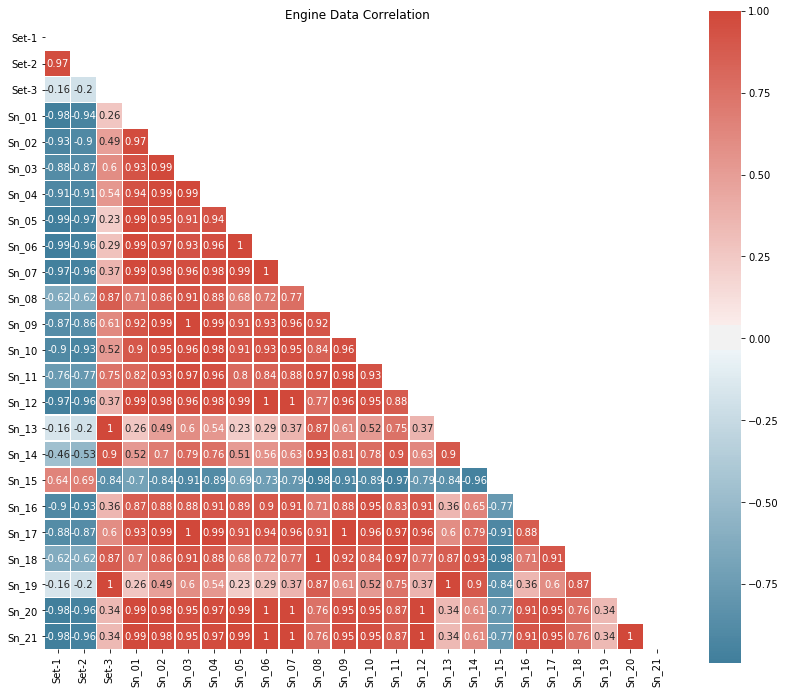

In [16]:
# Visualise Dataset Correlations

plt.figure(figsize = (14, 12))

# Create symmetry mask
mask = np.zeros_like(sensor_corr)
mask[np.triu_indices_from(sensor_corr)] = True

# Create diverging colour map
cmap = sns.diverging_palette(230, 15, n = 10, as_cmap = True)

# Create heatmap figure
corr_fig = sns.heatmap(sensor_corr, mask = mask, cmap = cmap, square = True, annot = True, linewidths = 0.5)

plt.title('Engine Data Correlation')

plt.show()

# Save the plot.
fig_name = r'\engine_data_correlation.png'

In [8]:
# Reduce highly-correlated sensors
correlation_threshold = 0.95
    
correlated_data = preprocessing.find_correlated_data(raw_data_df, correlation_threshold)
    
columns_to_be_removed = preprocessing.list_correlated_data(correlated_data)
    
processed_df = preprocessing.dataset_remove_columns(raw_data_df, columns_to_be_removed)

print(processed_df.info)

('Set-1', 'Set-2', 0.9674867889671144)
('Set-1', 'Sn_01', -0.9797973290289915)
('Set-1', 'Sn_05', -0.9915388567696042)
('Set-1', 'Sn_06', -0.9853782378943808)
('Set-1', 'Sn_07', -0.9717579352780341)
('Set-1', 'Sn_12', -0.9715264484034108)
('Set-1', 'Sn_20', -0.9776637915928451)
('Set-1', 'Sn_21', -0.9776736903412999)
('Set-2', 'Sn_05', -0.9656911894102925)
('Set-2', 'Sn_06', -0.9637204879784712)
('Set-2', 'Sn_07', -0.9584691138205325)
('Set-2', 'Sn_12', -0.9584039766714951)
('Set-2', 'Sn_20', -0.9596576639551743)
('Set-2', 'Sn_21', -0.9596555320049158)
('Set-3', 'Sn_13', 0.9999982383993787)
('Set-3', 'Sn_19', 0.9999999999961684)
('Sn_01', 'Sn_02', 0.9694074550566841)
('Sn_01', 'Sn_05', 0.9925495941228226)
('Sn_01', 'Sn_06', 0.9924467972872356)
('Sn_01', 'Sn_07', 0.9853508936218474)
('Sn_01', 'Sn_12', 0.9852046051150567)
('Sn_01', 'Sn_20', 0.9878559613205932)
('Sn_01', 'Sn_21', 0.9878641554218723)
('Sn_02', 'Sn_03', 0.9891414728111858)
('Sn_02', 'Sn_04', 0.9888643398644963)
('Sn_02', 'S